[詳解 ディープラーニング ~TensorFlow・Kerasによる時系列データ処理~](https://www.amazon.co.jp/dp/4839962510) に沿って動かしてみます

# 3章　ニューラルネットワーク（後半）

## 3.5 多クラスロジスティック回帰

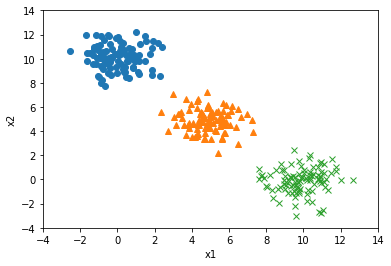

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

np.random.seed(0)
tf.set_random_seed(0)

M = 2      # 入力データの次元
K = 3      # クラス数
n = 100    # クラスごとのデータ数
N = n * K  # 全データ数

#
#データの生成
#
# クラス1: (0,10)付近
C1X = np.random.randn(n, M) + np.array([0, 10])
C1Y = np.array([[1, 0, 0] for i in range(n)])
# クラス2: (5,5)付近
C2X = np.random.randn(n, M) + np.array([5, 5])
C2Y = np.array([[0, 1, 0] for i in range(n)])
# クラス3: (10,0)付近
C3X = np.random.randn(n, M) + np.array([10, 0])
C3Y = np.array([[0, 0, 1] for i in range(n)])

# 3クラス分のデータを結合して全体のデータを作成
X = np.concatenate((C1X, C2X, C3X), axis=0)
Y = np.concatenate((C1Y, C2Y, C3Y), axis=0)

# データをプロット
plt.plot(C1X[:,0],C1X[:,1],'o')
plt.plot(C2X[:,0],C2X[:,1],'^')
plt.plot(C3X[:,0],C3X[:,1],'x')
plt.xlim(-4,14)
plt.ylim(-4,14)
plt.xlabel("x1")
plt.ylabel("x2")


In [2]:
#
# モデル設定
#
W = tf.Variable(tf.zeros([M, K]))
b = tf.Variable(tf.zeros([K]))

x = tf.placeholder(tf.float32, shape=[None, M])
t = tf.placeholder(tf.float32, shape=[None, K])
y = tf.nn.softmax(tf.matmul(x, W) + b)

# tf.reduce_mean()でミニバッチ毎の平均値を算出
# tf.reduce_sum()のreduction_indices=[1] …行方向の和
cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y),
                               reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

# 分類が正しいか確認用
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

In [3]:
#
# 学習実施
#

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# ミニバッチサイズ
batch_size = 50  
# ミニバッチでループさせる回数を切り捨て除算で算出
n_batches = N // batch_size

# ミニバッチ学習
# epoch=データ全体に対する反復回数
for epoch in range(20):
    # 全体をシャッフル
    X_, Y_ = shuffle(X, Y)
    
    # ミニバッチごとにループ
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size

        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })
    
    print("epoc:" ,epoch)
    print("   w:" ,sess.run(W))
    print("   b:" ,sess.run(b))

print("**** train finish ****")

print("w:" ,sess.run(W))
print("b:" ,sess.run(b))
        
        

epoc: 0
   w: [[-0.38313058  0.09856445  0.28456619]
 [ 0.26327565  0.11545909 -0.37873474]]
   b: [-0.01409902  0.02472855 -0.01062952]
epoc: 1
   w: [[-0.50611389  0.14210841  0.36400554]
 [ 0.3706499   0.13728492 -0.50793487]]
   b: [-0.01814101  0.03526382 -0.01712281]
epoc: 2
   w: [[-0.59270465  0.15630458  0.43640009]
 [ 0.43390161  0.16014709 -0.59404874]]
   b: [-0.02279811  0.04270132 -0.01990321]
epoc: 3
   w: [[-0.65814108  0.17078319  0.48735791]
 [ 0.48755571  0.17208369 -0.65963948]]
   b: [-0.02607446  0.04875067 -0.02267621]
epoc: 4
   w: [[-0.71184295  0.19440928  0.5174337 ]
 [ 0.52925223  0.18669502 -0.71594739]]
   b: [-0.02915178  0.05564693 -0.02649515]
epoc: 5
   w: [[-0.76220191  0.21493907  0.54726291]
 [ 0.55076629  0.21253556 -0.76330191]]
   b: [-0.03374689  0.06311526 -0.02936836]
epoc: 6
   w: [[-0.79748619  0.2156909   0.58179533]
 [ 0.59411359  0.20664136 -0.80075508]]
   b: [-0.03452959  0.06521688 -0.03068728]
epoc: 7
   w: [[-0.8353644   0.22393841  

In [4]:
#
# 学習結果の確認
#

# データ数が多いので、シャッフルしたうち10個で確認する
X_, Y_ = shuffle(X, Y)
test_X = X_[0:10]
test_Y = Y_[0:10]

print(test_X)
print(test_Y)

# シャッフルしたデータのうち10個で確認
classified = correct_prediction.eval(session=sess, feed_dict={
    x: test_X,
    t: test_Y
})
# 各クラスの確率（Softmaxの結果ベクトル）
prob = y.eval(session=sess, feed_dict={
    x: test_X
})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

[[ -1.03424284  10.68159452]
 [  5.52106488   4.42421203]
 [  0.95008842   9.84864279]
 [  4.40268393   4.76207827]
 [ 10.370825     0.14206181]
 [  4.63530646   5.15670386]
 [  8.86019754   0.78495752]
 [  8.0481959   -0.65989173]
 [ 10.86259601  -2.65561909]
 [ -0.4555325   10.01747916]]
[[1 0 0]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [1 0 0]]
classified:
[ True  True  True  True  True  True  True  True  True  True]

output probability:
[[  9.98682678e-01   1.31731527e-03   2.58784910e-10]
 [  3.43130948e-03   9.69049275e-01   2.75194254e-02]
 [  9.69157398e-01   3.08425445e-02   5.09097688e-08]
 [  1.93514787e-02   9.70684528e-01   9.96400509e-03]
 [  4.12158085e-09   8.59103166e-03   9.91409004e-01]
 [  1.71545204e-02   9.76335824e-01   6.50969939e-03]
 [  2.30860678e-07   4.24577259e-02   9.57542002e-01]
 [  7.25345686e-08   8.87839682e-03   9.91121531e-01]
 [  8.43027297e-12   1.41838231e-04   9.99858141e-01]
 [  9.95894194e-01   4.10580169e-03  

-2.55298981583
12.6962240526
---train result---
[[-1.09312928  0.30058849  0.79254127]
 [ 0.79545879  0.2939766  -1.08943546]]
[-0.05914814  0.10808326 -0.04893514]
---C1---
-1.09313
0.795459
-0.0591481
---C2---
0.300588
0.293977
0.108083
---C3---
0.792541
-1.08944
-0.0489351


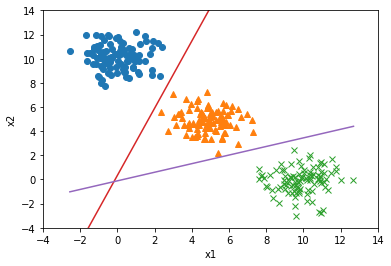

In [5]:
# グラフ描画用　Xの範囲を抽出
x1_min = X[:,0].min()
x1_max = X[:,0].max()
print(x1_min)
print(x1_max)

plt.plot(C1X[:,0],C1X[:,1],'o')
plt.plot(C2X[:,0],C2X[:,1],'^')
plt.plot(C3X[:,0],C3X[:,1],'x')
plt.xlim(-4,14)
plt.ylim(-4,14)
plt.xlabel("x1")
plt.ylabel("x2")


# 学習結果をNdArrayに詰める
result_w = sess.run(W)
result_b = sess.run(b)
print("---train result---")
print(result_w)
print(result_b)


# クラス1: (0,10)付近
C1_w1 = result_w[0,0]
C1_w2 = result_w[1,0]
C1_b = result_b[0]
print("---C1---")
print(C1_w1)
print(C1_w2)
print(C1_b)

# クラス2: (5,5)付近
C2_w1 = result_w[0,1]
C2_w2 = result_w[1,1]
C2_b = result_b[1]
print("---C2---")
print(C2_w1)
print(C2_w2)
print(C2_b)

# クラス3: (10,0)付近
C3_w1 = result_w[0,2]
C3_w2 = result_w[1,2]
C3_b = result_b[2]
print("---C3---")
print(C3_w1)
print(C3_w2)
print(C3_b)

x1 = np.linspace(x1_min, x1_max, 5)
# C1とC2の分類直線
# C1_w1 * x1 + C1_w2 * x2 + C1_b = C2_w1 * x1 + C2_w2 * x2 + C2_b
x2 = ((C2_w1 - C1_w1) * x1) / (C1_w2 - C2_w2)  + (C2_b - C1_b) / (C1_w2 - C2_w2)
plt.plot(x1, x2, "-")

# C3とC2の分類直線
# C3_w1 * x1 + C3_w2 * x2 + C3_b = C2_w1 * x1 + C2_w2 * x2 + C2_b
x2 = ((C2_w1 - C3_w1) * x1) / (C3_w2 - C2_w2)  + (C2_b - C3_b) / (C3_w2 - C2_w2)
plt.plot(x1, x2, "-")


## 3.6 多層パーセプトロン

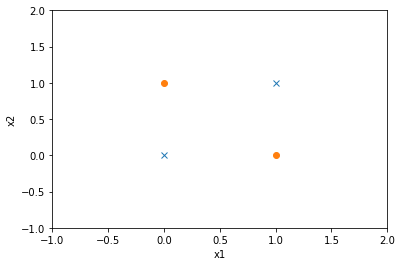

In [6]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


tf.set_random_seed(0)

#
# データの生成 (XOR)
#
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0],    [1],    [1],    [0]])


plt.plot([0, 1],[0, 1],'x')
plt.plot([0, 1],[1, 0],'o')
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.xlabel("x1")
plt.ylabel("x2")

In [7]:
#
# モデル設定
#
x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

# 入力層 - 隠れ層
W = tf.Variable(tf.truncated_normal([2, 2]))
b = tf.Variable(tf.zeros([2]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

# 隠れ層 - 出力層
V = tf.Variable(tf.truncated_normal([2, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) + c)

cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

# 正しく分類できているか確認用 
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

#
# モデル学習
#
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for epoch in range(4000):
    sess.run(train_step, feed_dict={
        x: X,
        t: Y
    })
    if epoch % 1000 == 0:
        print('epoch:', epoch)

print("W:" ,sess.run(W))
print("b:" ,sess.run(b))
print("V:"  ,sess.run(V))
print("c:"  ,sess.run(c))


epoch: 0
epoch: 1000
epoch: 2000
epoch: 3000
W: [[-5.19005585 -6.88390779]
 [-5.19027519 -6.8854332 ]]
b: [ 7.72547293  2.87054968]
V: [[ 10.97393703]
 [-11.4028511 ]]
c: [-5.12437439]


In [8]:
#
# 学習結果の確認
#
classified = correct_prediction.eval(session=sess, feed_dict={
    x: X,
    t: Y
})
prob = y.eval(session=sess, feed_dict={
    x: X
})

print('classified:')
print(classified)
print()
print('output probability:')
print(prob)

classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[ 0.00705731]
 [ 0.99216789]
 [ 0.99216688]
 [ 0.01208413]]


W
[[-5.19005585 -6.88390779]
 [-5.19027519 -6.8854332 ]]
b
[ 7.72547293  2.87054968]


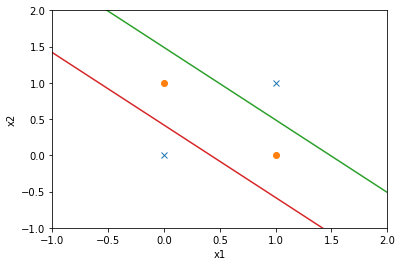

In [9]:
#
# 学習結果から境界線をひいてみる
#
plt.plot([0, 1],[0, 1],'x')
plt.plot([0, 1],[1, 0],'o')
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.xlabel("x1")
plt.ylabel("x2")

result_w = sess.run(W)
result_b = sess.run(b)
result_v = sess.run(V)
result_c = sess.run(c)
print("W")
print(result_w)
print("b")
print(result_b)


x1 = np.linspace(-1,2,4)
x2 = -(result_w[0][0] * x1 )/ result_w[1][0] - (result_b[0] / result_w[1][0])
plt.plot(x1, x2, "-")
x2 = -(result_w[0][1] * x1 )/ result_w[1][1] - (result_b[1] / result_w[1][1])
plt.plot(x1, x2, "-")
#x2 = -(result_w[0][2] * x1 )/ result_w[1][2] - (result_b[2] / result_w[1][2])
#plt.plot(x1, x2, "-")

## 3.7　モデルの評価

In [10]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

np.random.seed(0)
tf.set_random_seed(1234)

#
# データ作成
#

# P135. 月形のデータ（scikit-learnで提供されているサンプルデータセット）
N=300
X, y = datasets.make_moons(N, noise=0.3)
# Tensorflowではデータ数＝行数なのでreshapeする
Y = y.reshape(N, 1)
# 学習用データと検証用データを8:2に分割
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

print(X[0:5])
print(y[0:5])

[[ 0.99707159 -0.76407206]
 [-0.04007768 -0.34954567]
 [ 0.81875257  0.82918292]
 [ 1.2110974  -0.47101295]
 [ 0.93335442 -0.20031996]]
[1 1 0 1 1]


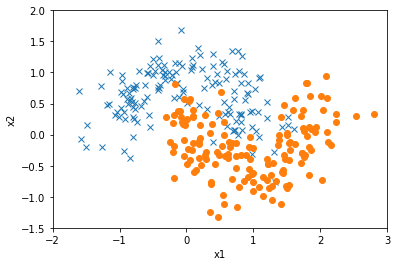

In [11]:
# y=0 -> class0, y=1 -> class1 に分けてプロットする

# y= 0
c0x1 = [] 
c0x2 = []
c0y = []
# y=1
c1x1 = []
c1x2 = []
c1y = []

for (i, tmpy) in enumerate(y):
    if tmpy == 0:
        c0x1.append(X[i][0])
        c0x2.append(X[i][1])
        c0y.append(tmpy)
    else:
        c1x1.append(X[i][0])
        c1x2.append(X[i][1])
        c1y.append(tmpy)

plt.plot(c0x1,c0x2,'x')
plt.plot(c1x1,c1x2,'o')
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.xlabel("x1")
plt.ylabel("x2")


In [12]:
#
# モデル定義
#

# 隠れ層の次元数
#num_hidden = 3
num_hidden = 2

x = tf.placeholder(tf.float32, shape=[None, 2])
t = tf.placeholder(tf.float32, shape=[None, 1])

# 入力層 - 隠れ層
W = tf.Variable(tf.truncated_normal([2, num_hidden]))
b = tf.Variable(tf.zeros([num_hidden]))
h = tf.nn.sigmoid(tf.matmul(x, W) + b)

# 隠れ層 - 出力層
V = tf.Variable(tf.truncated_normal([num_hidden, 1]))
c = tf.Variable(tf.zeros([1]))
y = tf.nn.sigmoid(tf.matmul(h, V) + c)

cross_entropy = - tf.reduce_sum(t * tf.log(y) + (1 - t) * tf.log(1 - y))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)


# 正解確認用
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)
# 正解率=accuracy計算用
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



In [13]:
#
# 学習実施
#

# ミニバッチのデータサイズ
batch_size = 20
n_batches = N // batch_size

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 学習用のデータ（X_train, Y_train）を使う
for epoch in range(500):
    X_, Y_ = shuffle(X_train, Y_train)

    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size

        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })
    if epoch % 100 == 0:
        print('epoch:', epoch)


epoch: 0
epoch: 100
epoch: 200
epoch: 300
epoch: 400


In [14]:
#
# 検証用のデータで予測精度の評価を実施
#

accuracy_rate = accuracy.eval(session=sess, feed_dict={
    x: X_test,
    t: Y_test
})
print('accuracy: ', accuracy_rate)

accuracy:  0.883333


W
[[-10.22826004   0.10896086]
 [  2.5584085   -2.59649229]]
b
[-6.83141661  1.27981746]


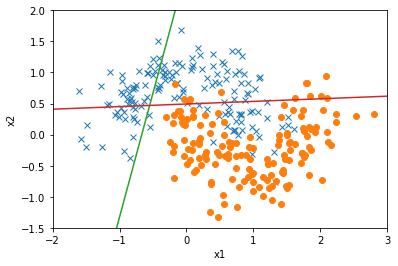

In [15]:
#
# 学習結果から境界線をひく
#
plt.plot(c0x1,c0x2,'x')
plt.plot(c1x1,c1x2,'o')
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.xlabel("x1")
plt.ylabel("x2")

result_w = sess.run(W)
result_b = sess.run(b)
print("W")
print(result_w)
print("b")
print(result_b)


x1 = np.linspace(-2,3,10)
x2 = -(result_w[0][0] * x1 )/ result_w[1][0] - (result_b[0] / result_w[1][0])
plt.plot(x1, x2, "-")
x2 = -(result_w[0][1] * x1 )/ result_w[1][1] - (result_b[1] / result_w[1][1])
plt.plot(x1, x2, "-")
# num_hidden=3の場合
if num_hidden == 3:
    x2 = -(result_w[0][2] * x1 )/ result_w[1][2] - (result_b[2] / result_w[1][2])
    plt.plot(x1, x2, "-")

Data Num: 240


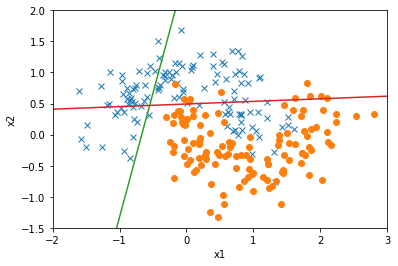

In [16]:
#
# 学習用データをプロットしてみる
#
# y=0
c0x1_train = [] 
c0x2_train = []
c0y_train = []
# y=1
c1x1_train = []
c1x2_train = []
c1y_train = []

print("Data Num:", Y_train.size)

for (i, tmpy) in enumerate(Y_train):
    if tmpy == 0:
        c0x1_train.append(X_train[i][0])
        c0x2_train.append(X_train[i][1])
        c0y_train.append(tmpy)
    else:
        c1x1_train.append(X_train[i][0])
        c1x2_train.append(X_train[i][1])
        c1y_train.append(tmpy)

plt.plot(c0x1_train,c0x2_train,'x')
plt.plot(c1x1_train,c1x2_train,'o')
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.xlabel("x1")
plt.ylabel("x2")
x1 = np.linspace(-2,3,10)
x2 = -(result_w[0][0] * x1 )/ result_w[1][0] - (result_b[0] / result_w[1][0])
plt.plot(x1, x2, "-")
x2 = -(result_w[0][1] * x1 )/ result_w[1][1] - (result_b[1] / result_w[1][1])
plt.plot(x1, x2, "-")
# num_hidden=3の場合
if num_hidden == 3:
    x2 = -(result_w[0][2] * x1 )/ result_w[1][2] - (result_b[2] / result_w[1][2])
    plt.plot(x1, x2, "-")

Data Num: 60


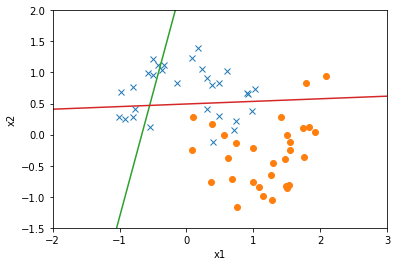

In [17]:
# 検証用データをプロットしてみる
# y=0
c0x1_test = [] 
c0x2_test = []
c0y_test = []
# y=1
c1x1_test = []
c1x2_test = []
c1y_test = []

print("Data Num:", Y_test.size)

for (i, tmpy) in enumerate(Y_test):
    if tmpy == 0:
        c0x1_test.append(X_test[i][0])
        c0x2_test.append(X_test[i][1])
        c0y_test.append(tmpy)
    else:
        c1x1_test.append(X_test[i][0])
        c1x2_test.append(X_test[i][1])
        c1y_test.append(tmpy)

plt.plot(c0x1_test,c0x2_test,'x')
plt.plot(c1x1_test,c1x2_test,'o')
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.xlabel("x1")
plt.ylabel("x2")
x1 = np.linspace(-2,3,10)
x2 = -(result_w[0][0] * x1 )/ result_w[1][0] - (result_b[0] / result_w[1][0])
plt.plot(x1, x2, "-")
x2 = -(result_w[0][1] * x1 )/ result_w[1][1] - (result_b[1] / result_w[1][1])
plt.plot(x1, x2, "-")
# num_hidden=3の場合
if num_hidden == 3:
    x2 = -(result_w[0][2] * x1 )/ result_w[1][2] - (result_b[2] / result_w[1][2])
    plt.plot(x1, x2, "-")